In [1]:
import numpy as np
import matplotlib.pyplot as plt

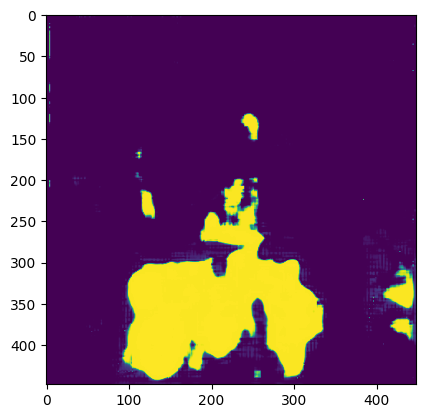

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
mask_path = 'res/dataset/centrum_west_small/masks/TMX7316010203-002026_pano_0000_003451/right.png'

# Load the mask
mask = plt.imread(mask_path)

plt.imshow(mask)
plt.show()

mask.dtype

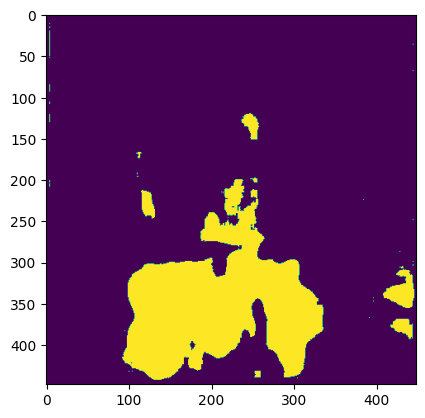

In [6]:
# Threshold the mask
mask2 = mask > 0.5

plt.imshow(mask2)
plt.show()

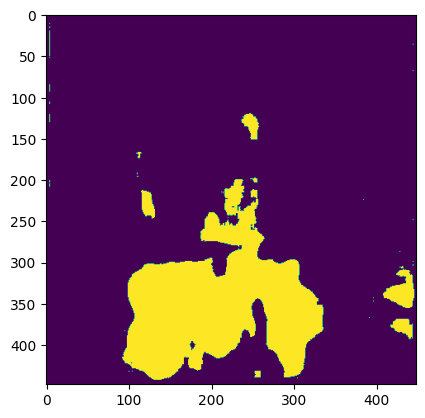

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [9]:
import cv2

mask3 = np.where(mask2 > 0.5, 1, 0).astype(np.uint8)

plt.imshow(mask3)
plt.show()
# Convert to uint8

print(mask3)

In [ ]:
import cv2

# Use cv2 find contours to find the contours
contours, hierarchy = cv2.findContours(mask3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
mask4 = cv2.drawContours(mask3, contours, -1, (0, 255, 0), 3)

plt.imshow(mask4)
plt.show()

In [ ]:
import json
import pycocotools.mask as mask_util

# Open .json file from res/dataset/centrum_west_small/backprojected/input_coco_format.json
with open('res/dataset/centrum_west_small/backprojected/input_coco_format.json') as f:
    data = json.load(f)

for instance in data:
    mask = mask_util.decode(instance['segmentation'])

    plt.imshow(mask)
    plt.show()

In [ ]:
import sys

sys.path.append("lib/Geolocalization_of_Street_Objects/")
from triangulation import triangulate

input_file = "res/dataset/centrum_west_small/backprojected/input_coco_format.json"
output_file = "res/dataset/centrum_west_small/backprojected/object_locations.csv"
cluster_intersections = triangulate.triangulate(input_file)

In [ ]:
from triangulation.triangulate import triangulate

input_file = "res/dataset/centrum_west_small/backprojected/input_coco_format.json"
output_file = "res/dataset/centrum_west_small/backprojected/object_locations.csv"
cluster_intersections = triangulate(input_file)

In [ ]:
from triangulation import triangulate

triangulate.write_output(output_file, cluster_intersections)